# **PROJETO ANÁLISE DOS DADOS DE INFLAÇÃO**

Este projeto analisa os dados de inflação por país entre os anos de 2007 e 2023.

Fonte dos dados:

https://www.kaggle.com/

# **Importação dos Dados**

In [2]:
import numpy as np
import pandas as pd

In [3]:
dados_inflacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analise de Dados/dados_de_inflacao_por_pais.csv', sep=';', encoding='utf-8')

In [4]:
dados_inflacao

,"Open,""High"",""Low"",""Close"",""Inflation"",""country"",""ISO3"",""date"""
0,"0.53,0.54,0.53,0.53,,""Afghanistan"",""AFG"",""2007..."
1,"0.53,0.54,0.53,0.53,,""Afghanistan"",""AFG"",""2007..."
2,"0.54,0.54,0.53,0.53,,""Afghanistan"",""AFG"",""2007..."
3,"0.53,0.55,0.53,0.55,,""Afghanistan"",""AFG"",""2007..."
4,"0.56,0.57,0.56,0.57,,""Afghanistan"",""AFG"",""2007..."
...,...
4793,"2.74,2.78,2.7,2.75,-0.28,""Yemen, Rep."",""YEM"",""..."
4794,"2.79,2.83,2.75,2.81,-1.85,""Yemen, Rep."",""YEM"",..."
4795,"2.85,2.89,2.81,2.83,-3.17,""Yemen, Rep."",""YEM"",..."
4796,"2.86,2.97,2.82,2.97,1.68,""Yemen, Rep."",""YEM"",""..."


Corrigindo o separador para vírgula.
Como o separador estava definido ponto-e-vírgula, o pandas entendeu que os dados correspondiam a apenas uma coluna.

In [5]:
dados_inflacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analise de Dados/dados_de_inflacao_por_pais.csv', sep=',', encoding='utf-8')

In [6]:
dados_inflacao

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4793,2.74,2.78,2.70,2.75,-0.28,"Yemen, Rep.",YEM,2023-06-01
4794,2.79,2.83,2.75,2.81,-1.85,"Yemen, Rep.",YEM,2023-07-01
4795,2.85,2.89,2.81,2.83,-3.17,"Yemen, Rep.",YEM,2023-08-01
4796,2.86,2.97,2.82,2.97,1.68,"Yemen, Rep.",YEM,2023-09-01


In [7]:
dados_inflacao.head()

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01


In [9]:
dados_inflacao.shape

(4798, 8)

# **Tratamento dos Dados**

Excluindo colunas.

In [20]:
dados_inflacao.drop(columns=['Open','High','Low','Close'],inplace=True)

In [21]:
dados_inflacao.head(3)

,Inflacao,Pais,Data
0,NaN,Afghanistan,2007-01-01
1,NaN,Afghanistan,2007-02-01
2,NaN,Afghanistan,2007-03-01


Renomeando colunas.

In [14]:
dados_inflacao = dados_inflacao.rename(columns={'Inflation': 'Inflacao', 'country': 'Pais', 'date': 'Data'})

In [22]:
dados_inflacao.head(3)

,Inflacao,Pais,Data
0,NaN,Afghanistan,2007-01-01
1,NaN,Afghanistan,2007-02-01
2,NaN,Afghanistan,2007-03-01


Analisando os tipos de dados.

In [23]:
dados_inflacao.dtypes

Inflacao           float64
Pais                object
Data        datetime64[ns]
dtype: object

Alterando o tipo de dado do campo "Data".

In [18]:
dados_inflacao['Data'] = dados_inflacao['Data'].astype('datetime64[D]')

Analisando valores missing (NaN).

In [24]:
dados_inflacao.isnull().sum()

Inflacao    364
Pais          0
Data          0
dtype: int64

Excluindo valores missing (NaN) da coluna "Inflacao".

In [33]:
dados_inflacao2 = dados_inflacao.loc[dados_inflacao.Inflacao.notnull()]

In [34]:
dados_inflacao2

,Inflacao,Pais,Data
12,41.18,Afghanistan,2008-01-01
13,44.45,Afghanistan,2008-02-01
14,53.62,Afghanistan,2008-03-01
15,66.52,Afghanistan,2008-04-01
16,77.51,Afghanistan,2008-05-01
...,...,...,...
4793,-0.28,"Yemen, Rep.",2023-06-01
4794,-1.85,"Yemen, Rep.",2023-07-01
4795,-3.17,"Yemen, Rep.",2023-08-01
4796,1.68,"Yemen, Rep.",2023-09-01


Contagem da coluna "Pais".

In [35]:
dados_inflacao2['Pais'].value_counts().sort_index()

Afghanistan                 190
Burkina Faso                190
Burundi                     190
Cameroon                    151
Central African Republic    190
Chad                        190
Congo, Dem. Rep.            190
Congo, Rep.                 142
Gambia, The                 190
Guinea-Bissau               190
Haiti                       190
Iraq                        130
Lao PDR                     165
Lebanon                     130
Liberia                     190
Mali                        190
Mozambique                  190
Myanmar                     178
Niger                       190
Nigeria                     190
Somalia                     190
South Sudan                 190
Sudan                       190
Syrian Arab Republic        142
Yemen, Rep.                 166
Name: Pais, dtype: int64

Resetando o Índice.

In [36]:
dados_inflacao2.reset_index(drop=True)

,Inflacao,Pais,Data
0,41.18,Afghanistan,2008-01-01
1,44.45,Afghanistan,2008-02-01
2,53.62,Afghanistan,2008-03-01
3,66.52,Afghanistan,2008-04-01
4,77.51,Afghanistan,2008-05-01
...,...,...,...
4429,-0.28,"Yemen, Rep.",2023-06-01
4430,-1.85,"Yemen, Rep.",2023-07-01
4431,-3.17,"Yemen, Rep.",2023-08-01
4432,1.68,"Yemen, Rep.",2023-09-01


Filtrando somente os dados de 2021.

In [38]:
dados_inflacao_2021 = dados_inflacao2.loc[(dados_inflacao2['Data'] > '2021-01-01') & (dados_inflacao2['Data'] <= '2021-12-31')]

In [39]:
dados_inflacao_2021

,Inflacao,Pais,Data
169,13.89,Afghanistan,2021-02-01
170,10.86,Afghanistan,2021-03-01
171,5.28,Afghanistan,2021-04-01
172,2.63,Afghanistan,2021-05-01
173,1.75,Afghanistan,2021-06-01
...,...,...,...
4771,29.19,"Yemen, Rep.",2021-08-01
4772,27.31,"Yemen, Rep.",2021-09-01
4773,32.76,"Yemen, Rep.",2021-10-01
4774,48.63,"Yemen, Rep.",2021-11-01


Substituir nome do país 'Afghanistan' por 'Afeganistao'.

In [42]:
dados_inflacao_2021['Pais'] = dados_inflacao_2021['Pais'].replace({'Afghanistan':'Afeganistao'})

<ipython-input-42-1de279a78f04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_inflacao_2021['Pais'] = dados_inflacao_2021['Pais'].replace({'Afghanistan':'Afeganistão'})


In [43]:
dados_inflacao_2021

,Inflacao,Pais,Data
169,13.89,Afeganistao,2021-02-01
170,10.86,Afeganistao,2021-03-01
171,5.28,Afeganistao,2021-04-01
172,2.63,Afeganistao,2021-05-01
173,1.75,Afeganistao,2021-06-01
...,...,...,...
4771,29.19,"Yemen, Rep.",2021-08-01
4772,27.31,"Yemen, Rep.",2021-09-01
4773,32.76,"Yemen, Rep.",2021-10-01
4774,48.63,"Yemen, Rep.",2021-11-01


Filtrar somente dados do Afeganistao.

In [44]:
dados_inflacao_2021 = dados_inflacao_2021.loc[dados_inflacao_2021.Pais == 'Afeganistao']

In [45]:
dados_inflacao_2021

,Inflacao,Pais,Data
169,13.89,Afeganistao,2021-02-01
170,10.86,Afeganistao,2021-03-01
171,5.28,Afeganistao,2021-04-01
172,2.63,Afeganistao,2021-05-01
173,1.75,Afeganistao,2021-06-01
174,4.27,Afeganistao,2021-07-01
175,8.03,Afeganistao,2021-08-01
176,10.03,Afeganistao,2021-09-01
177,11.86,Afeganistao,2021-10-01
178,12.52,Afeganistao,2021-11-01


In [49]:
soma_inflacao = sum(dados_inflacao_2021['Inflacao'])

In [50]:
soma_inflacao

98.98

Adicionar coluna com a porcentagem da inflação.

In [53]:
dados_inflacao_2021['Porcentagem Inflacao'] = round((dados_inflacao_2021['Inflacao'] / soma_inflacao) * 100,2)

<ipython-input-53-8433be117de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_inflacao_2021['Porcentagem Inflacao'] = round((dados_inflacao_2021['Inflacao'] / soma_inflacao) * 100,2)


In [54]:
dados_inflacao_2021

,Inflacao,Pais,Data,Porcentagem Inflacao
169,13.89,Afeganistao,2021-02-01,14.03
170,10.86,Afeganistao,2021-03-01,10.97
171,5.28,Afeganistao,2021-04-01,5.33
172,2.63,Afeganistao,2021-05-01,2.66
173,1.75,Afeganistao,2021-06-01,1.77
174,4.27,Afeganistao,2021-07-01,4.31
175,8.03,Afeganistao,2021-08-01,8.11
176,10.03,Afeganistao,2021-09-01,10.13
177,11.86,Afeganistao,2021-10-01,11.98
178,12.52,Afeganistao,2021-11-01,12.65


Excluir coluna adicionada anteriormente.

In [57]:
dados_inflacao_2021.drop(['Porcentagem Inflacao'], axis=1)

,Inflacao,Pais,Data
169,13.89,Afeganistao,2021-02-01
170,10.86,Afeganistao,2021-03-01
171,5.28,Afeganistao,2021-04-01
172,2.63,Afeganistao,2021-05-01
173,1.75,Afeganistao,2021-06-01
174,4.27,Afeganistao,2021-07-01
175,8.03,Afeganistao,2021-08-01
176,10.03,Afeganistao,2021-09-01
177,11.86,Afeganistao,2021-10-01
178,12.52,Afeganistao,2021-11-01


# **Análise Gráfica**

In [59]:
import matplotlib.pyplot as plt

In [138]:
eixo_x = dados_inflacao_2021['Data'].value_counts()
eixo_y = dados_inflacao_2021['Inflacao'].value_counts()

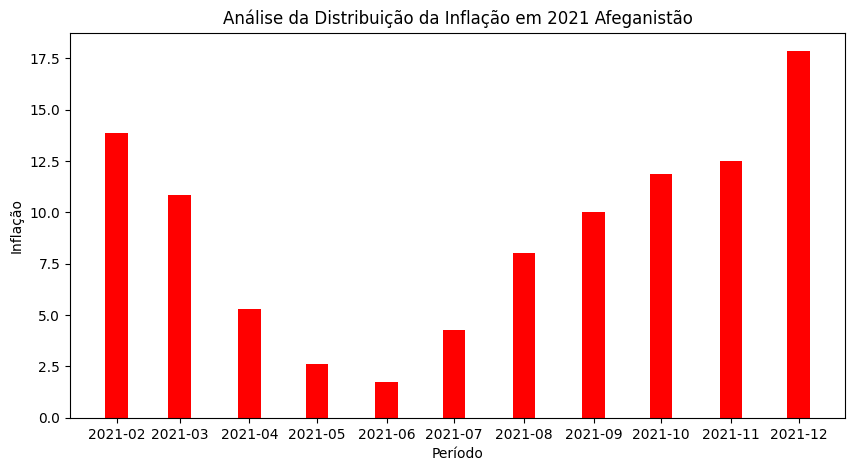

In [146]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(eixo_x.index, eixo_y.index, color = 'red', width = 10)
plt.title('Análise da Distribuição da Inflação em 2021 Afeganistão')
plt.ylabel('Inflação')
plt.xlabel('Período')
plt.show()

In [120]:
dados_inflacao = dados_inflacao.loc[dados_inflacao.Inflacao.notnull()]
dados_inflacao3 = dados_inflacao.loc[dados_inflacao.Pais == 'Afghanistan']
dados_inflacao3

,Inflacao,Pais,Data
12,41.18,Afghanistan,2008-01-01
13,44.45,Afghanistan,2008-02-01
14,53.62,Afghanistan,2008-03-01
15,66.52,Afghanistan,2008-04-01
16,77.51,Afghanistan,2008-05-01
...,...,...,...
197,-2.05,Afghanistan,2023-06-01
198,-3.95,Afghanistan,2023-07-01
199,-4.70,Afghanistan,2023-08-01
200,-6.50,Afghanistan,2023-09-01


Análise do gráfico de dispersão: foi observado que a inflação disparou no Afeganistão entre 2008 e 2009, onde provavelmente a causa foi a crise de 2008.

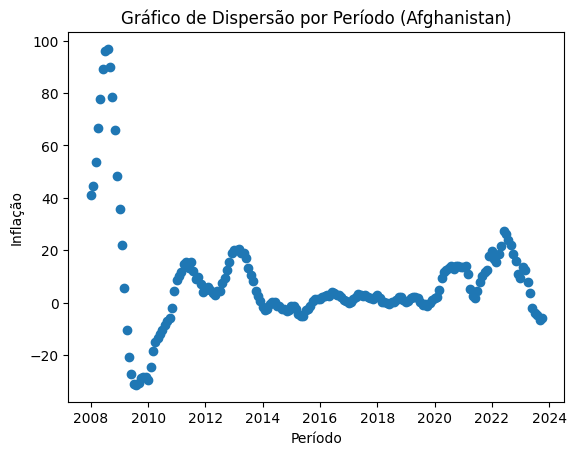

In [144]:
plt.scatter(dados_inflacao3.Data,dados_inflacao3.Inflacao)
plt.title('Gráfico de Dispersão por Período (Afghanistan)')
plt.xlabel('Período')
plt.ylabel('Inflação')
plt.grid(False)
plt.show()

Analisando outros países através da inserção de parâmetros.

In [166]:
v_data_inicio = ''
v_data_fim = ''
v_pais = 'Nigeria' # Afghanistan | Nigeria | Mozambique | Mali | Liberia ...
dados_inflacao4 = dados_inflacao.loc[dados_inflacao.Pais == v_pais]
if v_data_inicio != '' and v_data_fim != '':
  dados_inflacao4 = dados_inflacao4.loc[(dados_inflacao2['Data'] > v_data_inicio) & (dados_inflacao2['Data'] <= v_data_fim)]
dados_inflacao4

,Inflacao,Pais,Data
3468,21.11,Nigeria,2008-01-01
3469,32.49,Nigeria,2008-02-01
3470,32.65,Nigeria,2008-03-01
3471,32.94,Nigeria,2008-04-01
3472,34.75,Nigeria,2008-05-01
...,...,...,...
3653,11.02,Nigeria,2023-06-01
3654,11.45,Nigeria,2023-07-01
3655,11.83,Nigeria,2023-08-01
3656,12.33,Nigeria,2023-09-01


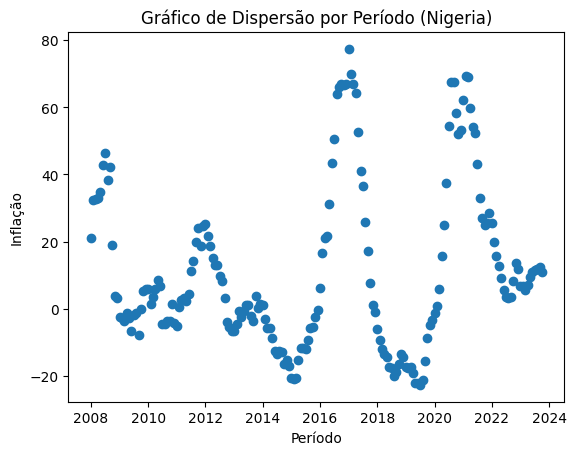

In [167]:
plt.scatter(dados_inflacao4.Data,dados_inflacao4.Inflacao)
plt.title('Gráfico de Dispersão por Período (' + v_pais + ')')
plt.xlabel('Período')
plt.ylabel('Inflação')
plt.grid(False)
plt.show()